In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [4]:
df = pd.read_excel("Microsoft_10k.xlsx")
print(df.head())

     Company  Year  Total Revenue (in millions)  Net Income(in millions)  \
0  Microsoft  2023                       211915                    72361   
1  Microsoft  2022                       198270                    72738   
2  Microsoft  2021                       168088                    61271   
3      Tesla  2023                        96773                    14974   
4      Tesla  2022                        81462                    12587   

   Total Assets (in millions)  Total Liablities (in millions)  \
0                      411976                          205753   
1                      364840                          198298   
2                      333779                          191791   
3                      106618                           43009   
4                       82338                           36440   

   Operating Expenses (R & D)  Total  Cash Flow  
0                       27195             57529  
1                       24512             52237  
2 

In [8]:
# year-over-year changes for each financial metric

df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue (in millions)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income(in millions)'].pct_change() * 100

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Company                         9 non-null      object 
 1   Year                            9 non-null      int64  
 2   Total Revenue (in millions)     9 non-null      int64  
 3   Net Income(in millions)         9 non-null      int64  
 4   Total Assets (in millions)      9 non-null      int64  
 5   Total Liablities (in millions)  9 non-null      int64  
 6   Operating Expenses (R & D)      9 non-null      int64  
 7   Total  Cash Flow                9 non-null      int64  
 8   Revenue Growth (%)              6 non-null      float64
 9   Net Income Growth (%)           6 non-null      float64
dtypes: float64(2), int64(7), object(1)
memory usage: 852.0+ bytes


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,9.0,2022.000000,0.866025,2021.000000,2021.000000,2022.000000,2023.000000,2023.000000
Total Revenue (in millions),9.0,217084.555556,133913.789489,53823.000000,96773.000000,198270.000000,365817.000000,394328.000000
Net Income(in millions),9.0,59005.888889,38231.680758,5644.000000,14974.000000,72361.000000,94680.000000,99803.000000
Total Assets (in millions),9.0,268669.111111,140780.645366,62131.000000,106618.000000,351002.000000,352755.000000,411976.000000
Total Liablities (in millions),9.0,176252.333333,112621.131472,30548.000000,43009.000000,198298.000000,287912.000000,302083.000000
Operating Expenses (R & D),9.0,17793.333333,11271.159446,2593.000000,3969.000000,21914.000000,26251.000000,29915.000000
Total Cash Flow,9.0,36520.555556,22057.674153,7021.000000,8769.000000,45940.000000,52237.000000,57529.000000
Revenue Growth (%),6.0,-12.626829,12.478983,-33.928703,-15.671840,-11.226476,-6.636746,2.881146
Net Income Growth (%),6.0,-14.763828,21.318799,-55.160086,-15.896923,-10.448956,-0.892529,2.894995


In [11]:
df.head()

,Company,Year,Total Revenue (in millions),Net Income(in millions),Total Assets (in millions),Total Liablities (in millions),Operating Expenses (R & D),Total Cash Flow,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211915,72361,411976,205753,27195,57529,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,24512,52237,-6.438902,0.520999
2,Microsoft,2021,168088,61271,333779,191791,20716,45940,-15.222676,-15.764800
3,Tesla,2023,96773,14974,106618,43009,3969,8769,NaN,NaN
4,Tesla,2022,81462,12587,82338,36440,3075,7021,-15.821562,-15.940964


In [12]:
 # Round the calculated growth percentages to 2 decimal places
 df['Revenue Growth (%)'] = df['Revenue Growth (%)'].round(2)
 df['Net Income Growth (%)'] = df['Net Income Growth (%)'].round(2)


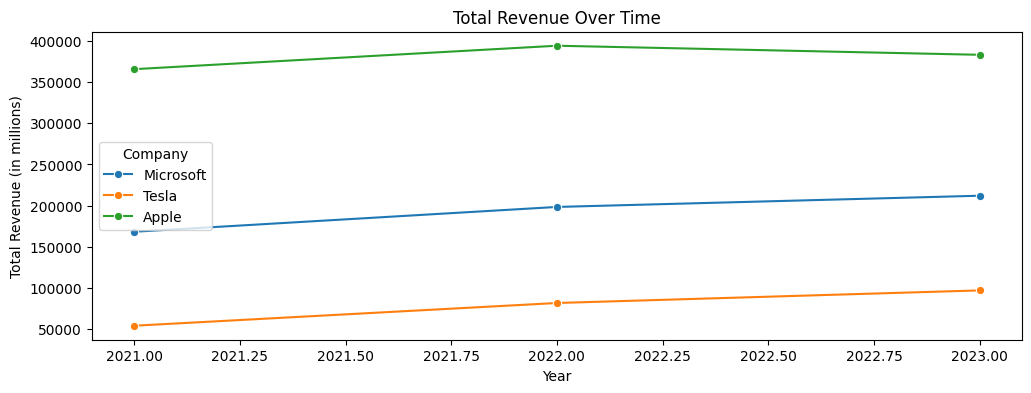

In [13]:
 # Line chart for Total Revenue over time
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company', marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()


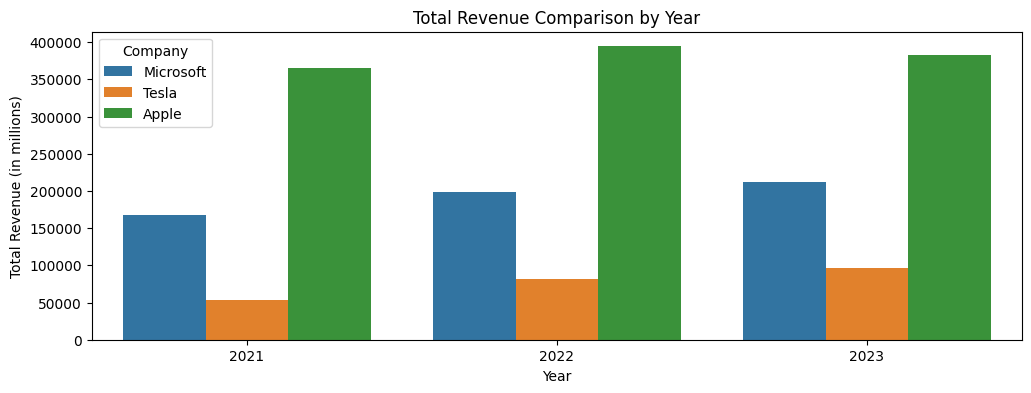

In [14]:
 # Bar chart for Total Revenue comparison
 plt.figure(figsize=(12,4))
 sns.barplot(data=df, x='Year', y='Total Revenue (in millions)', hue='Company')
 plt.title('Total Revenue Comparison by Year')
 plt.ylabel('Total Revenue (in millions)')
 plt.xlabel('Year')
 plt.grid(False)
 plt.show()

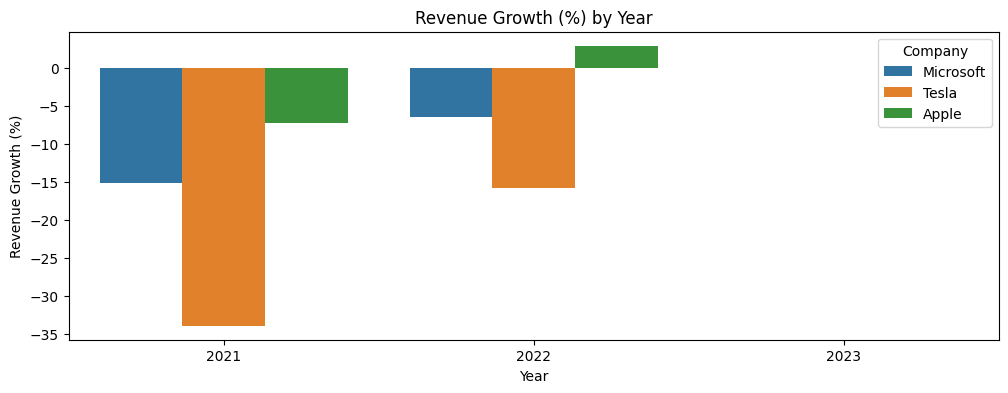

In [15]:
# Bar chart for Revenue Growth (%)
plt.figure(figsize=(12,4))
sns.barplot(data=df, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth (%) by Year')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

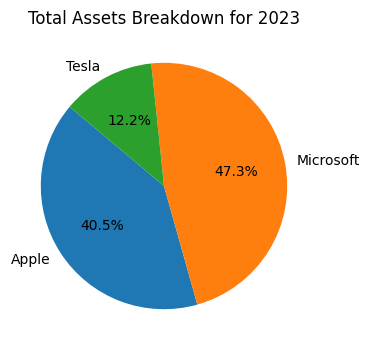

In [20]:
 # Pie chart for the breakdown of Total Assets for the most recent year
 latest_year = df['Year'].max()
 latest_data = df[df['Year'] == latest_year]
 latest_assets = latest_data.groupby('Company')['Total Assets (in millions)'].sum()
 plt.figure(figsize=(6,4))
 plt.pie(latest_assets, labels=latest_assets.index, autopct='%1.1f%%', startangle=140)
 plt.title(f'Total Assets Breakdown for {latest_year}')
 plt.show()

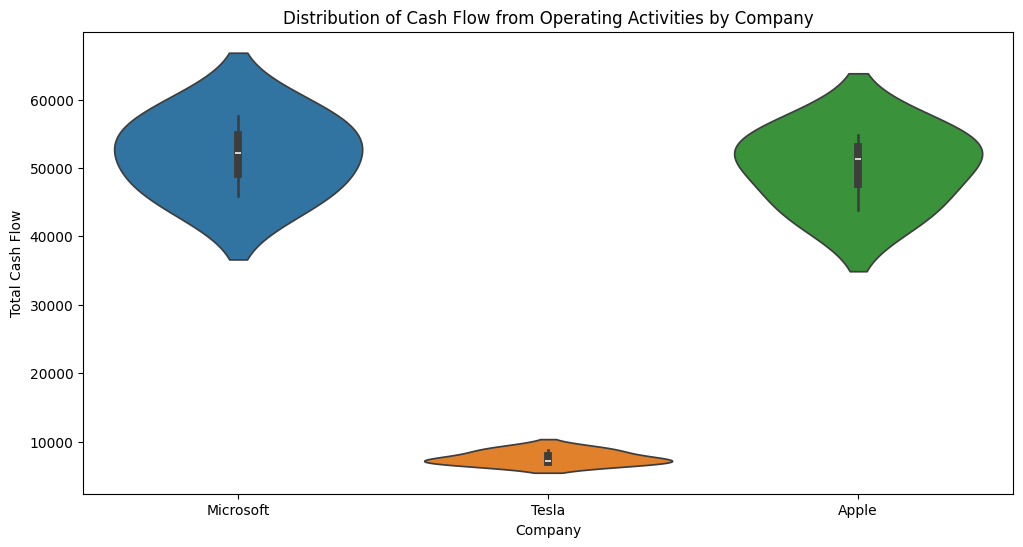

In [17]:
 # Violin plot for Cash Flow from Operating Activities
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Company', y='Total  Cash Flow', hue='Company')
plt.title('Distribution of Cash Flow from Operating Activities by Company')
plt.ylabel('Total Cash Flow')
plt.xlabel('Company')
plt.show()





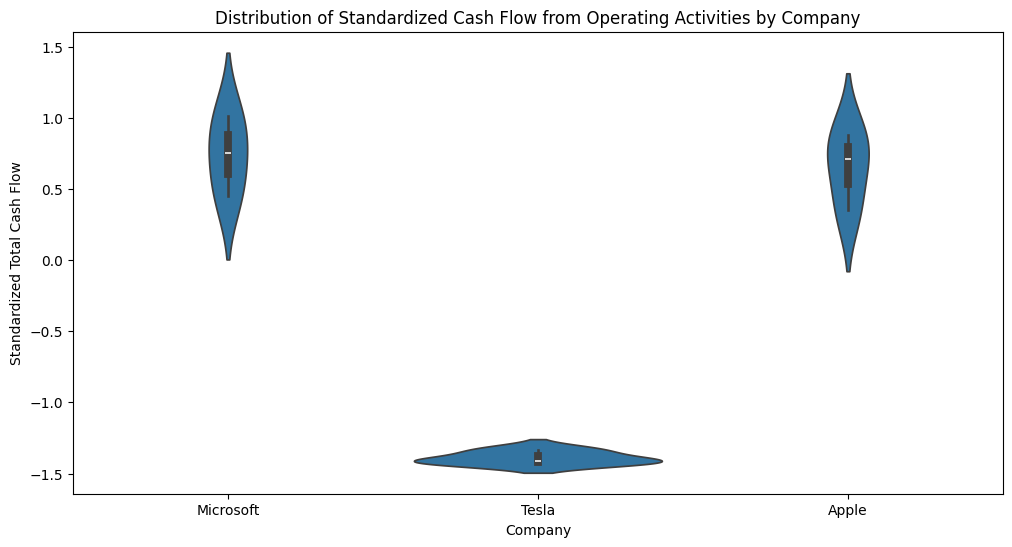

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming your data is in a DataFrame named df

# 1. Standardize the 'Total Cash Flow' column
scaler = StandardScaler()
df['Total Cash Flow_Standardized'] = scaler.fit_transform(df[['Total  Cash Flow']])

# 2. Create the violin plot using the standardized data
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Company', y='Total Cash Flow_Standardized')
plt.title('Distribution of Standardized Cash Flow from Operating Activities by Company')
plt.ylabel('Standardized Total Cash Flow')  # Update y-axis label
plt.xlabel('Company')
plt.show()




In [ ]:
Simplified summary of the financial performance of Apple, Microsoft, and Tesla:
Apple:
•	Revenue and net income grew in 2022, but saw a small dip in 2023.
•	Assets and liabilities stayed fairly consistent over the three years.
•	Cash flow was very strong in 2022, indicating efficient operations, and remained good in 2023.
Microsoft:
•	Strong growth in revenue and net income in 2022, with growth slowing in 2023.
•	Assets increased significantly in 2023, likely due to investments or acquisitions.
•	Liabilities increased moderately, and cash flow from operations showed consistent growth, indicating healthy performance.
Tesla:
•	Revenue grew the most among the three companies, especially in 2022.
•	Net income increased dramatically in 2022, showing a big jump in profits.
•	Assets and liabilities continued to grow, reflecting company expansion.
•	Cash flow had a small dip in 2022 but rebounded strongly in 2023, showing improved cash management.

